In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from matplotlib import pyplot as plt
%matplotlib inline

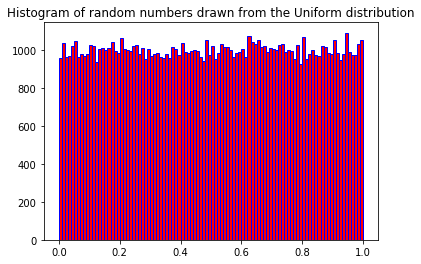

In [4]:
N = 100000
val = np.random.random(N)
plt.hist(val, 100, color='r', edgecolor='b')
plt.title("Histogram of random numbers drawn from the Uniform distribution")
plt.show()

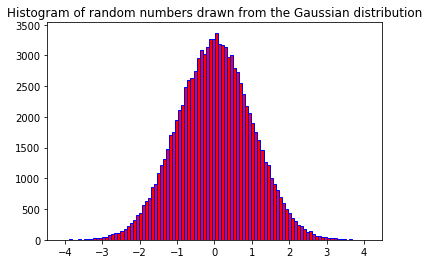

In [5]:
val2 = np.random.randn(N)
plt.hist(val2, 100, color='r', edgecolor='b')
plt.title("Histogram of random numbers drawn from the Gaussian distribution")

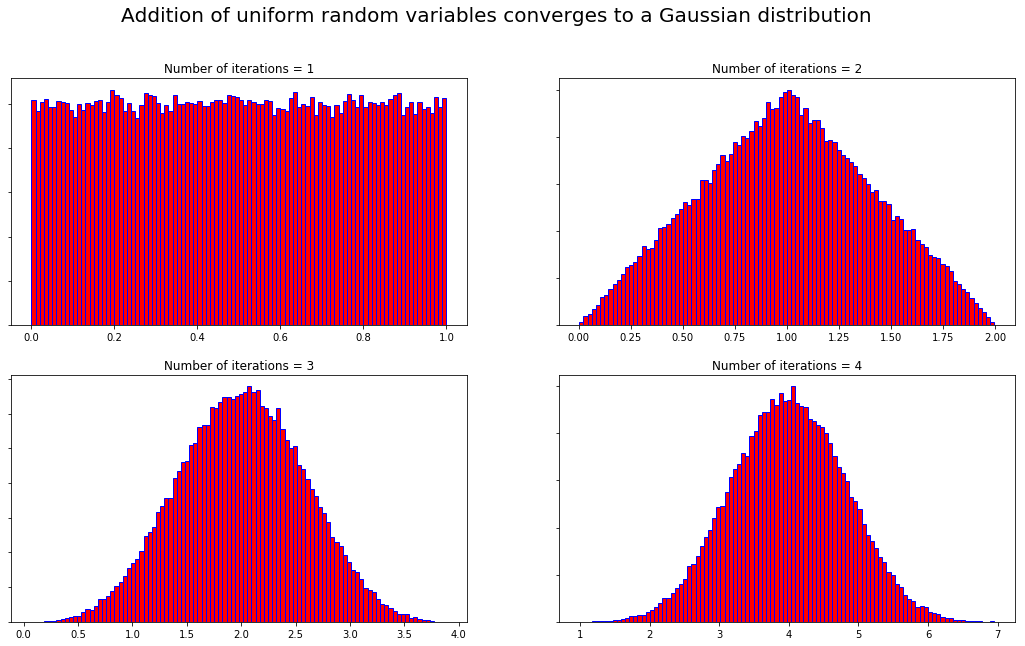

In [7]:
# define the number of iterations 
it = [1,2, 4, 8]

f = plt.figure(figsize=(18, 10))
for i in range(4):
    # define an array of zeros which will holds the sums
    x = np.zeros((N))
    subplot = f.add_subplot(2,2,i+1)
    for j in range(N):
        for k in range(it[i]):
            x[j]= x[j]+np.random.random()   
    plt.hist(x, 100, normed=True, color='r', edgecolor='b')
    plt.title('Number of iterations = '+str(i+1))
    plt.setp(subplot.get_yticklabels(), visible=False)

plt.suptitle("Addition of uniform random variables converges to a Gaussian distribution",fontsize=20);
plt.show()  

In [8]:
np.random.random()   


0.7948193188625385

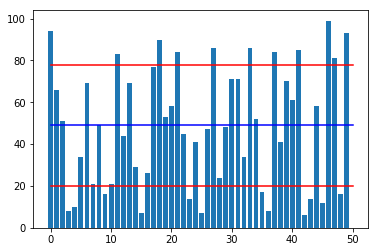

In [10]:
val3=[94, 66, 51,  8, 10, 34, 69, 21, 49, 16, 21, 83, 44, 69, 29,  7, 26,
       77, 90, 53, 58, 84, 45, 14, 41,  7, 47, 86, 24, 48, 71, 71, 34, 86,
       52, 17,  8, 84, 41, 70, 61, 85,  6, 14, 58, 12, 99, 81, 16, 93]
y_pos = range(50)
plt.bar(y_pos, val3)
plt.plot((0,50),(49,49),'b')
plt.plot((0,50),(49+29,49+29),'r')
plt.plot((0,50),(49-29,49-29),'r')
plt.show()

In [12]:
mean= np.mean(val3)
std = np.std(val3)
zscores=[]
for val in val3:
    z = (val-mean)/std
    zscores.append(z)

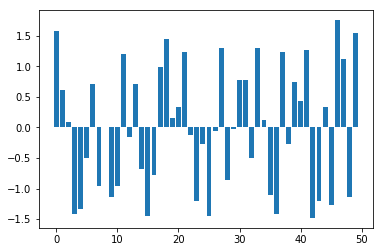

In [14]:
plt.bar(y_pos,zscores)
plt.show()

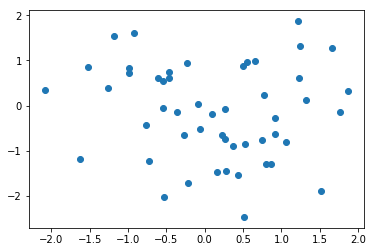

In [17]:
X = np.random.randn(1,50)
Y = np.random.randn(1,50)
plt.scatter(X,Y)
plt.show()

In [18]:
np.corrcoef(X,Y)

array([[ 1.        , -0.10533513],
       [-0.10533513,  1.        ]])

In [19]:
df = pd.DataFrame(np.random.randn(50, 2), columns=list('XY'))
df.head()

,X,Y
0,0.020314,-0.854396
1,0.427299,-0.217762
2,0.288567,-1.568774
3,-0.511581,-0.761925
4,-0.738755,-0.931853


In [21]:
df['X'].corr(df['Y']+df['X'])

0.60803807964165946

In [23]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

In [24]:
population.mean()

39.990566666666666

In [25]:
sample= np.random.choice(population, size=1000)  

In [26]:
sample_mean = sample.mean()
sample_mean

40.256

In [27]:
data = (['red']*50000) + (['blue']*30000) + (['green']*10000) + (['white']*10000) 

In [30]:
sample = random.sample(data, 100)  

for color in set(sample):
    print( color + " proportion estimate:" )
    print( sample.count(color)/100 )

red proportion estimate:
0.54
blue proportion estimate:
0.26
white proportion estimate:
0.1
green proportion estimate:
0.1


In [33]:
set(sample)

{'blue', 'green', 'red', 'white'}

In [34]:
intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(population, size = 1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    pop_std = population.std()  
    margin_of_error = z * (pop_std/np.sqrt(1000))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
    intervals.append(confidence_interval)

In [44]:
intervals


[(38.415105154048128, 40.572894845951872),
 (39.616105154048128, 41.773894845951872),
 (38.329105154048129, 40.486894845951873),
 (38.672105154048126, 40.82989484595187),
 (39.148105154048125, 41.305894845951869),
 (38.479105154048128, 40.636894845951872),
 (38.890105154048129, 41.047894845951873),
 (39.288105154048125, 41.445894845951869),
 (39.626105154048126, 41.78389484595187),
 (38.860105154048128, 41.017894845951872)]

In [48]:
z = stats.norm.ppf(q = 0.975)

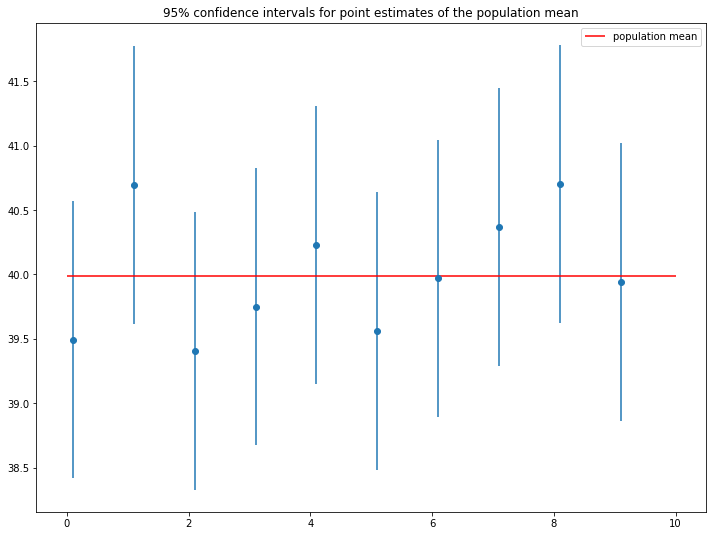

In [49]:
plt.figure(figsize=(12,9))

plt.errorbar(x=np.arange(0.1, 10, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=10, y=population.mean(),color="red", label='population mean')
plt.legend()
plt.title('95% confidence intervals for point estimates of the population mean')
plt.show()

In [47]:
z

1.5422245745004637

In [50]:
data =pd.DataFrame(['red']*50000 + ['blue']*30000 + ['green']*10000 + ['white']*10000) 
sample = pd.DataFrame(['red']*600 + ['blue']*300 + ['green']*70 + ['white']*60) 

In [51]:
data_count = pd.crosstab(index=data[0], columns="count")
data_count

col_0,count
0,
blue,30000
green,10000
red,50000
white,10000


In [52]:
sample_count= pd.crosstab(index=sample[0], columns="count")
sample_count

col_0,count
0,
blue,300
green,70
red,600
white,60


In [53]:
expected_count = data_count * len(sample) / len(data)
expected_count

col_0,count
0,
blue,309.0
green,103.0
red,515.0
white,103.0


In [54]:
chi_square = ((( sample_count - expected_count)**2) / expected_count).sum()
chi_square

col_0
count    42.815534
dtype: float64